Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  1.jpg


Emotion (input assumed to be face-only): Fear


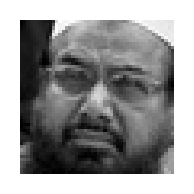

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  2.jpg


Emotion (input assumed to be face-only): Neutral


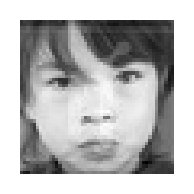

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  3.jpg


Emotion (input assumed to be face-only): Surprise


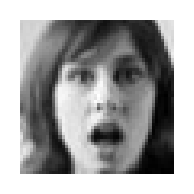

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  4.jpg


Emotion (input assumed to be face-only): Angry


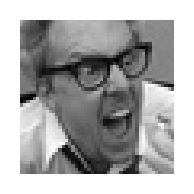

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  10.jpg


Emotion: Neutral


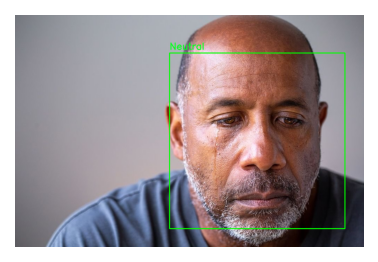

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  9.jpg


Emotion: Angry


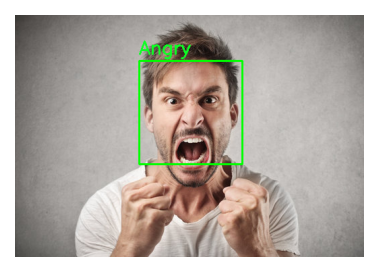

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  5.jpg


Emotion (input assumed to be face-only): Angry


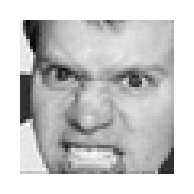

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  6.jpg


Emotion (input assumed to be face-only): Happy


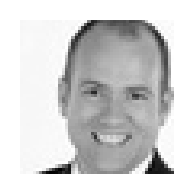

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  7.jpg


Emotion: Happy


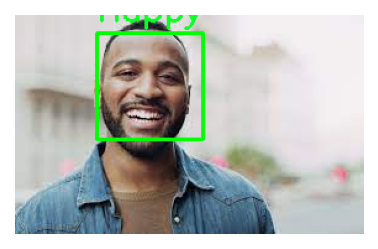

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  4.jpg


Emotion (input assumed to be face-only): Angry


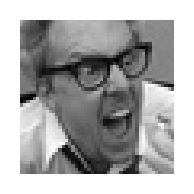

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  3.jpg


Emotion (input assumed to be face-only): Surprise


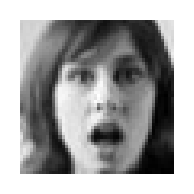

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  9.jpg


Emotion: Angry


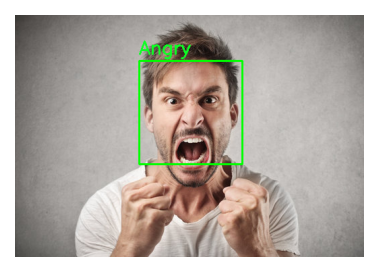

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  8.jpg


Emotion: Surprise


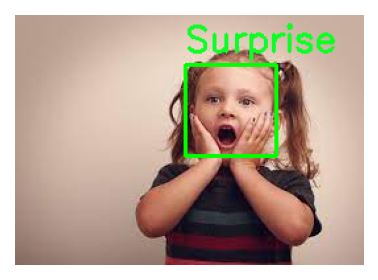

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  7.jpg


Emotion: Happy


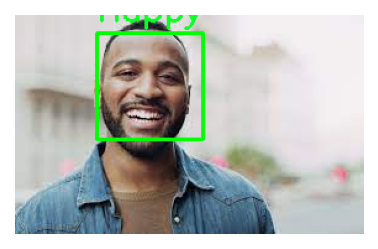

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  disgust.jpg


Emotion (input assumed to be face-only): Disgust


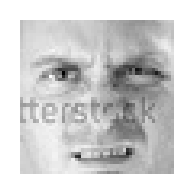

Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  anime.jpg


Không phát hiện được khuôn mặt nào.


Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát):  test.jpg


Emotion: Neutral


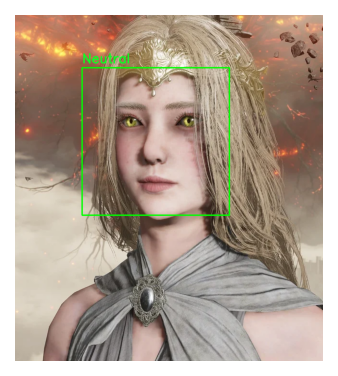

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

# Tải mô hình đã huấn luyện
model = load_model("emotion_recognition_model.keras")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Hàm dự đoán cảm xúc giảm retracing
@tf.function(reduce_retracing=True)
def predict_emotion_once(input_img):
    return model(input_img, training=False)

# Bộ phát hiện khuôn mặt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Vòng lặp nhập ảnh liên tục
while True:
    img_path = input("Nhập đường dẫn ảnh (hoặc gõ 'exit' để thoát): ").strip()
    if img_path.lower() in ['exit', 'quit']:
        print("Đã thoát chương trình.")
        break

    img = cv2.imread(img_path)
    if img is None:
        print(f"Không thể đọc ảnh: {img_path}")
        continue
    # Chuyển ảnh sang grayscale nếu ảnh là màu
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if img.shape[0] <= 64 or img.shape[1] <= 64:
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        img_resized = cv2.resize(img, (48, 48))
        input_img = img_resized.reshape(1, 48, 48, 1).astype("float32") / 255.0

        prediction = predict_emotion_once(input_img)
        emotion = emotion_labels[np.argmax(prediction)]
        print(f"Emotion (input assumed to be face-only): {emotion}")

        
        # Hiển thị ảnh kích thước nhỏ mà không in cảm xúc
        plt.figure(figsize=(1, 1), dpi=200)  # Kích thước figure nhỏ, DPI cao để rõ nét
        plt.imshow(img_resized, cmap='gray')
        plt.axis('off')  # Tắt trục
        plt.show()

    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        if len(faces) == 0:
            print("Không phát hiện được khuôn mặt nào.")
        else:
            # Tạo bản sao ảnh màu để vẽ
            img_display = img.copy()
            for (x, y, w, h) in faces:
                face = gray[y:y+h, x:x+w]
                face_resized = cv2.resize(face, (48, 48))
                input_img = face_resized.reshape(1, 48, 48, 1).astype("float32") / 255.0

                prediction = predict_emotion_once(input_img)
                emotion = emotion_labels[np.argmax(prediction)]
                print(f"Emotion: {emotion}")

                # Vẽ khung và nhãn cảm xúc
                cv2.rectangle(img_display, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(img_display, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

            # Hiển thị ảnh lớn trong cell
            plt.figure(figsize=(3, 3), dpi=150)  # Kích thước hợp lý, DPI giữ chất lượng
            plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))  # Chuyển BGR sang RGB
            plt.axis('off')
            plt.show()
